# Notebook to Make Lorenz Curves

In [338]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Data In

In [2]:
# File paths

data_raw = '/Users/cascade/Github/NTL/data/raw/'
data_temp = '/Users/cascade/Github/NTL/temp_data/'
data_interim = '/Users/cascade/Github/NTL/data/interim/'
ms_data = '/Users/cascade/Github/NTL/temp_data/MS_Data/'
erl_data = '/Users/cascade/Github/NTL/temp_data/ERL_data/'
downloads = '/Users/cascade/Downloads/'

In [3]:
# Data

GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_final20190122.shp')
GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_final20190122.shp')
WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_final20190122.shp')
WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_final20190122.shp')
LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_final20190122.shp')
WPE2016 = gpd.read_file(erl_data+'LS15_final20190122.shp')

In [4]:
# List of datasets

datasets_in = [GHS2000, GHS2015, WP2000, WP2015, LS2015, WPE2016]

### Add Rain Zones & Regions

In [5]:
### List of African Countries from the UN in OSM wiki

Northern_Africa = (['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara'], 'Northern_Africa')

Eastern_Africa = ([
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    #Mayotte,
    'Mozambique',
    'Réunion',
    'Rwanda',
    'Somalia',
    'Sudan',
    'Uganda',
    'Tanzania',
    'Zambia',
    'Zimbabwe'], 'Eastern_Africa')
    
Middle_Africa = ([
    'Angola',
    'Cameroon',
    'Central African Republic',
    'Chad',
    'Congo-Brazzaville',
    'Congo-Kinshasa',
    'Equatorial Guinea',
    'Gabon',
    'Sao Tome and Principe'], 'Middle_Africa')
    
Southern_Africa = ([
    'Botswana',
    'Lesotho',
    'Namibia',
    'South Africa',
    'Swaziland'], 'Southern_Africa')
    
Western_Africa = ([
    'Benin',
    'Burkina Faso',
    'Cape Verde',
    'Côte d\'Ivoire',
    'Gambia',
    'Ghana',
    'Guinea',
    'Guinea-Bissau',
    'Liberia',
    'Mali',
    'Mauritania',
    'Niger',
    'Nigeria',
    'Senegal',
    'Sierra Leone',
    'Togo'], 'Western_Africa')

In [6]:
regions = [Northern_Africa, Western_Africa, Eastern_Africa, Southern_Africa, Middle_Africa]

In [7]:
def region(gpd_df, regions_list):
    "Function adds a new col to a df based on region"
    arr =[]
    for region in regions_list:
        for country in region[0]:
            for i, row in gpd_df.iterrows():
                if row['country'] == country:
                    #row['region'] = region[1] 
                    #df_copy.iloc[i] = row
                    #region[1]
                    arr.append(region[1])
    gpd_df['region'] = arr
    
    return gpd_df

In [8]:
for dataset in datasets_in:
    dataset = region(dataset, regions)

In [9]:
# Group my rainfall zone

arid = (['Temperate / arid', 
         'Subtropic - warm / arid', 
         'Subtropic - cool / arid', 
         'Tropic - warm / arid',
         'Tropic - cool / arid'], 'Arid')

semi_arid = (['Temperate / Semi-arid', 
              'Subtropic - warm / semiarid', 
              'Subtropic - cool / semiarid',
              'Tropic - warm / semiarid', 
              'Tropic - cool / semiarid'], 'Semi-arid')    

sub_humid = (['Temperate / sub-humid', 
              'Subtropic - warm / subhumid', 
              'Subtropic - cool / subhumid',
              'Tropic - warm / subhumid', 
              'Tropic - cool / subhumid'], 'Sub-humid')

humid = (['Temperate / humid', 
          'Subtropic - warm / humid', 
          'Subtropic - cool / humid', 
          'Tropic - warm / humid',
          'Tropic - cool / humid'], 'Humid')

boreal = (['Boreal'], 'Boreal')

na = (['NoClass', '0'], 'NA')

rain_list = [arid, semi_arid, sub_humid, humid, boreal, na]

In [10]:
def rain_zone(gpd_df, rain_list):
    "function adds a new col to a gpd_df based on rain fall zone"
    arr =[]
    for rain_zone in rain_list:
        for aez in rain_zone[0]:
            for i, row in gpd_df.iterrows():
                if row['aez_class'] == aez:
                    arr.append(rain_zone[1])
                
    gpd_df['rain_zone'] = arr
    
    return gpd_df

In [11]:
for dataset in datasets_in:
    dataset = rain_zone(dataset, rain_list)

In [12]:
# Drop Duplicate FIDs (Polygons) and <5000 people 

print('1---WP2015---') # World Pop 2015

# drop FID
print(len(WP2015))
WP2015 = WP2015.drop_duplicates('FID', keep = 'first')
print(len(WP2015))

# drop <5000
WP2015 = WP2015[WP2015['PopTot'] > 5000]
print(len(WP2015))

print('2---LS2015---') # LandScan 2015
# drop FID
print(len(LS2015))
LS2015 = LS2015.drop_duplicates('FID', keep = 'first')
print(len(LS2015))

# drop <5000
LS2015 = LS2015[LS2015['PopTot'] > 5000]
print(len(LS2015))

print('3---WPE2016---') # WPE 2016
# drop FID
print(len(WPE2016))
WPE2016 = WPE2016.drop_duplicates('FID', keep = 'first')
print(len(WPE2016))

# drop <5000
WPE2016 = WPE2016[WPE2016['PopTot'] > 5000]
print(len(WPE2016))

print('4---GHS2015---') # GHS 2015
# drop FID
print(len(GHS2015))
GHS2015 = GHS2015.drop_duplicates('FID', keep = 'first')
print(len(GHS2015))

# drop <5000
GHS2015 = GHS2015[GHS2015['PopTot'] > 5000]
print(len(GHS2015))

print('5---GHS2000---') # GHS 2000
# drop FID
print(len(GHS2000))
GHS2000 = GHS2000.drop_duplicates('FID', keep = 'first')
print(len(GHS2000))

# drop <5000
GHS2000 = GHS2000[GHS2000['PopTot'] > 5000]
print(len(GHS2000))

      
print('6---WP2000---') # World Pop 2000

# drop FID
print(len(WP2000))
WP2000 = WP2000.drop_duplicates('FID', keep = 'first')
print(len(WP2000))

# drop <5000
WP2000 = WP2000[WP2000['PopTot'] > 5000]
print(len(WP2000))

1---WP2015---
3854
2616
2411
2---LS2015---
5598
4217
3801
3---WPE2016---
5552
4347
3643
4---GHS2015---
6229
5026
4162
5---GHS2000---
5854
4951
3858
6---WP2000---
3152
2259
2061


### Lorzen Curves

https://zhiyzuo.github.io/Plot-Lorenz/

#### Functions

In [ ]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [35]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

#### Select data

In [294]:
GHS2000.rain_zone.unique()

array(['Arid', 'Semi-arid', 'Sub-humid', 'Humid', 'NA'], dtype=object)

In [332]:
## Rain Zone
X = np.sort(np.array(GHS2000[GHS2000['rain_zone'] == 'Semi-arid'].PopTot))
Y = np.sort(np.array(GHS2015[GHS2015['rain_zone'] == 'Semi-arid'].PopTot))

print(len(X))
print(len(Y))
## Country
# X = np.sort(np.array(GHS2000[GHS2000['country'] == 'Chad'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['country'] == 'Chad'].PopTot))

## All Africa 
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

## Conditional
# X = np.sort(np.array(GHS2000[GHS2000['PopTot'] < 5*10**6].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['PopTot'] < 5*10**6].PopTot))

# X = GHS2000.loc[(GHS2000['rain_zone'] == 'Arid') & (GHS2000['country'] != 'Egpyt')]
# X = np.sort(np.array(X.PopTot))

# Y = GHS2015.loc[(GHS2015['rain_zone'] == 'Arid') & (GHS2015['country'] != 'Egpyt')]
# Y = np.sort(np.array(Y.PopTot))


X = X[(X < 5*10**6)]
Y = Y[(Y < 5*10**6)]

print(len(X))
print(len(Y))

1320
1498
1319
1494


In [333]:
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

(0.0, 1.0)

In [334]:
Y_lorenz = Y.cumsum() / Y.sum()
Y_lorenz = np.insert(Y_lorenz, 0, 0)
Y_lorenz[0], Y_lorenz[-1]

(0.0, 1.0000000000000002)

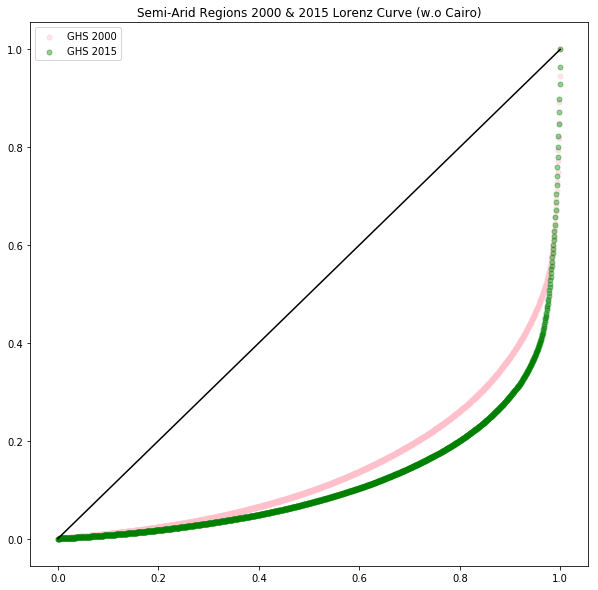

In [369]:
%matplotlib inline

## Size
fig, ax = plt.subplots(figsize=[10,10])

## scatter plot of Lorenz curve
ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Pink', s=100, alpha = 0.4)

ax.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
           marker='.', color='Green', s=100, alpha = 0.4)

## Title
plt.title('Semi-Arid Regions 2000 & 2015 Lorenz Curve (w.o Cairo)')
leg = ['GHS 2000', 'GHS 2015']

plt.legend(leg,loc=2)

## line plot of equality
ax.plot([0,1], [0,1], color='k')


ValueError: Could not generate a palette for <map object at 0x1a2aaa80b8>

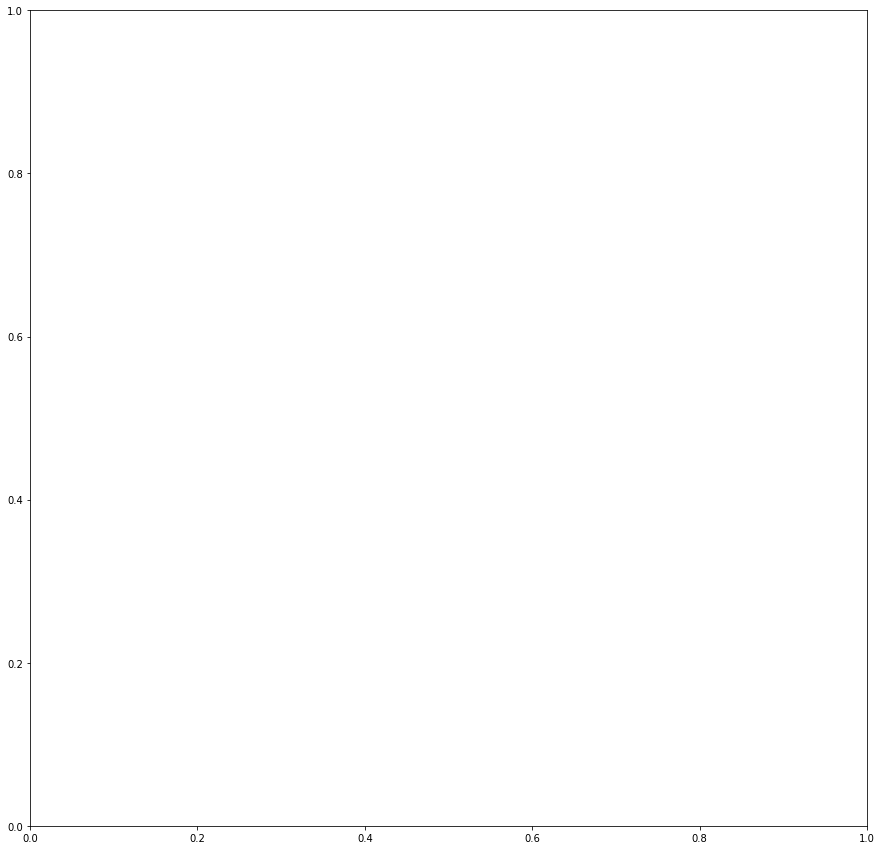

In [377]:
# test = np.log(GHS2000[GHS2000['country'] == 'Nigeria'].PopTot)
test = np.log10(GHS2015.PopTot)
colors = GHS2015.rain_zone
len(test)
fig, ax = plt.subplots(figsize=[15,15])
ax = sns.swarmplot(x=test, size =4, alpha = .5, palette = colors)

# boxen plots and violent plots are cool too